## Importing packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

## Load the CSV data 

In [2]:
prices_df = pd.read_csv("prices.csv")

#displaying the first 5 rows of the price dataframe

prices_df.head()

,Price Dates,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
0,01-01-2023,35.0,18,22.0,20,30,50,25,8,45.0,25
1,02-01-2023,35.0,16,22.0,20,30,55,25,7,40.0,25
2,03-01-2023,35.0,16,21.0,20,30,55,25,7,40.0,25
3,04-01-2023,30.0,16,21.0,22,25,55,25,7,40.0,25
4,08-01-2023,35.0,16,20.0,21,25,55,22,6,35.0,25


In [3]:
#Checking the data typesof the dataframe
prices_df.info()
prices_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Price Dates             287 non-null    object 
 1   Bhindi (Ladies finger)  287 non-null    float64
 2   Tomato                  287 non-null    int64  
 3   Onion                   287 non-null    float64
 4   Potato                  287 non-null    int64  
 5   Brinjal                 287 non-null    int64  
 6   Garlic                  287 non-null    int64  
 7   Peas                    287 non-null    int64  
 8   Methi                   287 non-null    int64  
 9   Green Chilli            287 non-null    float64
 10  Elephant Yam (Suran)    287 non-null    int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 24.8+ KB


,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
count,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,29.444251,16.006969,20.649826,18.585366,31.655052,133.101045,66.658537,20.383275,44.122404,28.797909
std,8.124815,0.118056,11.711204,2.726238,11.725421,60.078331,33.302415,117.428417,12.796590,6.607973
min,17.000000,16.000000,8.000000,12.000000,14.000000,50.000000,22.000000,5.000000,0.130000,12.000000
25%,22.000000,16.000000,12.000000,16.000000,25.000000,85.000000,40.000000,8.000000,35.000000,25.000000
50%,27.500000,16.000000,16.000000,20.000000,30.000000,120.000000,60.000000,12.000000,40.000000,30.000000
75%,33.000000,16.000000,25.000000,20.000000,35.000000,165.000000,80.000000,16.000000,50.000000,30.000000
max,60.000000,18.000000,57.000000,24.000000,80.000000,290.000000,150.000000,2000.000000,90.000000,50.000000


## Converting datatypes

In [4]:
#Convert the intergers to floats
prices_df[['Tomato', 'Potato', 'Brinjal', 'Garlic', 'Peas', 'Methi', 'Elephant Yam (Suran)']] = prices_df[['Tomato', 'Potato', 'Brinjal', 'Garlic', 'Peas', 'Methi', 'Elephant Yam (Suran)']].astype(float)

#Convert the date format
prices_df["Price Dates"] = pd.to_datetime(prices_df["Price Dates"], format="%d-%m-%Y")
prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Price Dates             287 non-null    datetime64[ns]
 1   Bhindi (Ladies finger)  287 non-null    float64       
 2   Tomato                  287 non-null    float64       
 3   Onion                   287 non-null    float64       
 4   Potato                  287 non-null    float64       
 5   Brinjal                 287 non-null    float64       
 6   Garlic                  287 non-null    float64       
 7   Peas                    287 non-null    float64       
 8   Methi                   287 non-null    float64       
 9   Green Chilli            287 non-null    float64       
 10  Elephant Yam (Suran)    287 non-null    float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 24.8 KB


## Correcting the Outliers

In [5]:
#Our central tendecy table showed that there is an outlier in the Methi data.
#Find the median for Methi

median_methi = np.median(prices_df['Methi'])
print(median_methi)

#Replace the outlier with the median
prices_df['Methi'] = np.where(prices_df['Methi'] == 2000, median_methi,prices_df['Methi'])
prices_df.describe()

12.0


,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
count,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,29.444251,16.006969,20.649826,18.585366,31.655052,133.101045,66.658537,13.456446,44.122404,28.797909
std,8.124815,0.118056,11.711204,2.726238,11.725421,60.078331,33.302415,6.256523,12.796590,6.607973
min,17.000000,16.000000,8.000000,12.000000,14.000000,50.000000,22.000000,5.000000,0.130000,12.000000
25%,22.000000,16.000000,12.000000,16.000000,25.000000,85.000000,40.000000,8.000000,35.000000,25.000000
50%,27.500000,16.000000,16.000000,20.000000,30.000000,120.000000,60.000000,12.000000,40.000000,30.000000
75%,33.000000,16.000000,25.000000,20.000000,35.000000,165.000000,80.000000,16.000000,50.000000,30.000000
max,60.000000,18.000000,57.000000,24.000000,80.000000,290.000000,150.000000,35.000000,90.000000,50.000000


## Create a column with the Seasons
We do this so we are able to analyse seasonal trends

In [6]:
#Create column defining the Seasons based on months
#Seasons in India taken from India Meteorological Department(IMD). See README file

prices_df['Season'] = prices_df['Price Dates'].dt.month.apply(lambda x: 'Winter' if x in [12, 1, 2] else
                                                                        'Summer' if x in [3, 4, 5] else
                                                                        'Rainy' if x in [6, 7, 8] else
                                                                        'Autumn')
prices_df.head(100)

,Price Dates,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran),Season
0,2023-01-01,35.0,18.0,22.0,20.0,30.0,50.0,25.0,8.0,45.0,25.0,Winter
1,2023-01-02,35.0,16.0,22.0,20.0,30.0,55.0,25.0,7.0,40.0,25.0,Winter
2,2023-01-03,35.0,16.0,21.0,20.0,30.0,55.0,25.0,7.0,40.0,25.0,Winter
3,2023-01-04,30.0,16.0,21.0,22.0,25.0,55.0,25.0,7.0,40.0,25.0,Winter
4,2023-01-08,35.0,16.0,20.0,21.0,25.0,55.0,22.0,6.0,35.0,25.0,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2023-05-07,24.5,16.0,10.0,20.0,25.0,90.0,70.0,10.0,30.0,15.0,Summer
96,2023-05-08,22.0,16.0,10.0,20.0,20.0,90.0,70.0,10.0,35.0,30.0,Summer
97,2023-05-09,20.0,16.0,10.0,20.0,20.0,90.0,60.0,10.0,40.0,30.0,Summer
98,2023-05-10,20.0,16.0,10.0,20.0,20.0,90.0,60.0,10.0,35.0,25.0,Summer


## Correlation Analysis

In [7]:
#Find the correlation coefficients

prices_corr = prices_df.corr()
prices_corr

,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
Bhindi (Ladies finger),1.000000,0.040505,0.135353,-0.142327,0.534585,0.211865,-0.391240,-0.095967,-0.209258,0.010470
Tomato,0.040505,1.000000,0.006829,0.030737,-0.008361,-0.081934,-0.074097,-0.051660,0.004062,-0.034045
Onion,0.135353,0.006829,1.000000,0.380323,0.147386,0.755264,0.255033,0.280014,-0.214595,0.300265
Potato,-0.142327,0.030737,0.380323,1.000000,0.353733,0.419036,0.289854,0.307553,0.087301,0.225328
Brinjal,0.534585,-0.008361,0.147386,0.353733,1.000000,0.367036,0.063371,0.380543,0.125150,0.096391
Garlic,0.211865,-0.081934,0.755264,0.419036,0.367036,1.000000,0.224896,0.287657,-0.100149,0.299406
Peas,-0.391240,-0.074097,0.255033,0.289854,0.063371,0.224896,1.000000,0.540051,0.358317,0.202458
Methi,-0.095967,-0.051660,0.280014,0.307553,0.380543,0.287657,0.540051,1.000000,0.197185,-0.032859
Green Chilli,-0.209258,0.004062,-0.214595,0.087301,0.125150,-0.100149,0.358317,0.197185,1.000000,-0.063119
Elephant Yam (Suran),0.010470,-0.034045,0.300265,0.225328,0.096391,0.299406,0.202458,-0.032859,-0.063119,1.000000


Text(0.5, 1.0, 'Price Correlation')

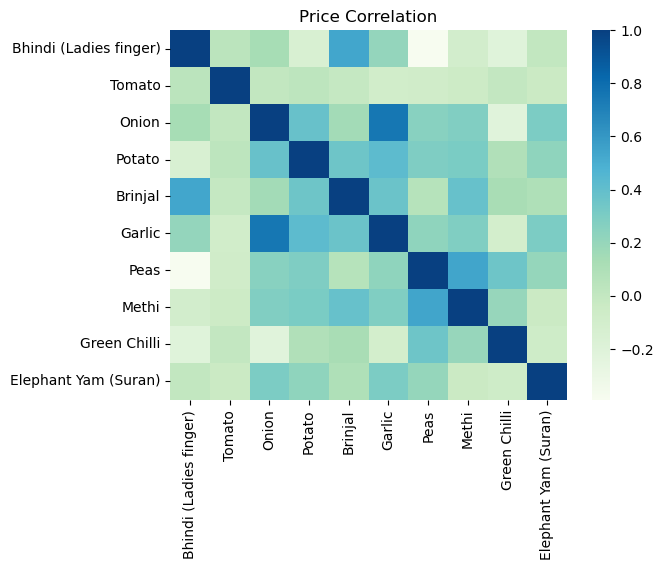

In [9]:
#Create a Correlation matrix
sns.heatmap(prices_corr, cmap = 'GnBu')
plt.title('Price Correlation')

In [32]:
from ipywidgets import interact, interact_manual, widgets

In [46]:
def show_correlation(prices_corr,vegetable1, vegetable2):
    """Analyzes the correlation between two vegetables based on a given correlation matrix.

  Args:
    correlation_matrix: A Pandas DataFrame representing the correlation matrix.
    vegetable1: The name of the first vegetable.
    vegetable2: The name of the second vegetable.

  Returns:
    The correlation value and string describing the strength of the correlation.
  """
    correlation_coefficient = prices_corr.loc[vegetable1,vegetable2]
    
    if correlation_coefficient > 0.8:
        return (f'{vegetable1} and {vegetable2} = {correlation_coefficient.round(3)} - Very Strong')
    elif correlation_coefficient >= 0.6:
        return (f'{vegetable1} and {vegetable2} = {correlation_coefficient.round(3)} -Strong')
    elif correlation_coefficient >= 0.4:
        return (f'{vegetable1} and {vegetable2} = {correlation_coefficient.round(3)} -Moderate')
    elif correlation_coefficient >= 0.2:
        return (f'{vegetable1} and {vegetable2} = {correlation_coefficient.round(3)} - Weak')
    else:
        return (f'{vegetable1} and {vegetable2} = {correlation_coefficient.round(3)} -Negligible')
    
    
show_correlation(prices_corr, 'Onion', 'Garlic')
    
    

'Onion and Garlic = 0.755 -Strong'

## Time Series Analysis

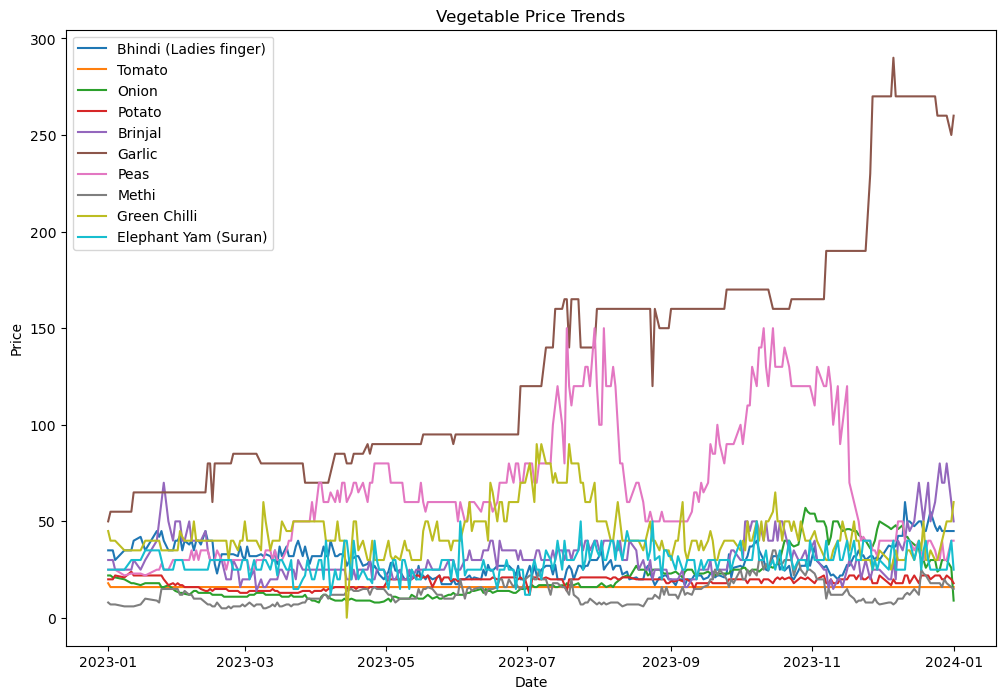

In [56]:
plt.figure(figsize=(12, 8))
for vegetable in prices_df.columns[1:11]:
    plt.plot(prices_df['Price Dates'], prices_df[vegetable], label = vegetable)
                       
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Vegetable Price Trends')
plt.legend()


## Visualising the spead

In [69]:
season_averages= prices_df.groupby('Season').mean()
season_averages

,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
Season,,,,,,,,,,
Autumn,26.500000,16.000000,33.611111,19.472222,30.180556,176.250000,92.486111,18.750000,40.097222,30.680556
Rainy,24.140000,16.000000,17.253333,20.066667,32.666667,132.600000,82.400000,13.253333,57.000000,30.360000
Summer,28.313333,16.000000,10.500000,16.453333,23.546667,84.466667,56.080000,10.533333,40.455067,25.520000
Winter,40.130769,16.030769,21.923077,18.353846,41.476923,142.000000,32.092308,11.200000,37.953846,28.692308


#### Creating the boxplot

In [82]:
# Melt the data to long format
data_melted = prices_df.melt(id_vars='Price Dates', var_name='Vegetable', value_name='Price')

#Convert 'Price' to numeric 
data_melted['Price'] = pd.to_numeric(data_melted['Price'], errors='coerce')

data_melted.head(10)

,Price Dates,Vegetable,Price
0,2023-01-01,Bhindi (Ladies finger),35.0
1,2023-01-02,Bhindi (Ladies finger),35.0
2,2023-01-03,Bhindi (Ladies finger),35.0
3,2023-01-04,Bhindi (Ladies finger),30.0
4,2023-01-08,Bhindi (Ladies finger),35.0
5,2023-01-11,Bhindi (Ladies finger),35.0
6,2023-01-12,Bhindi (Ladies finger),40.0
7,2023-01-15,Bhindi (Ladies finger),42.0
8,2023-01-17,Bhindi (Ladies finger),35.0
9,2023-01-22,Bhindi (Ladies finger),45.0


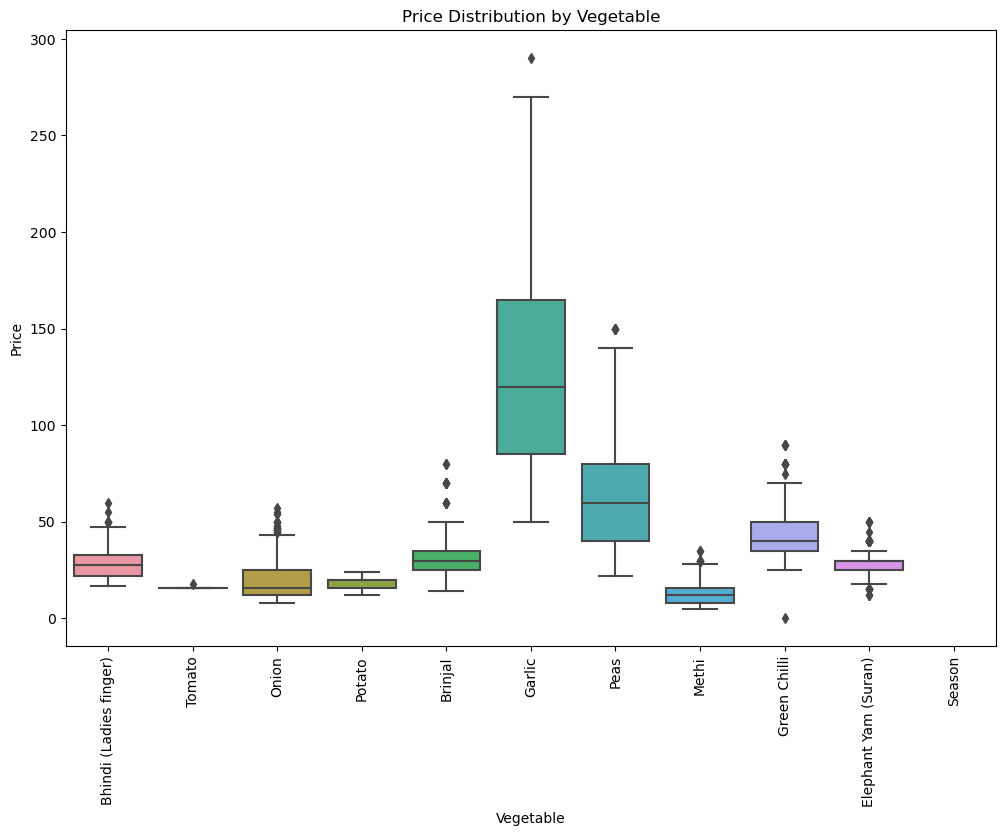

In [80]:
# Create the box plot

plt.figure(figsize=(12, 8))
sns.boxplot(x='Vegetable', y='Price', data=data_melted)
plt.title('Price Distribution by Vegetable')
plt.xticks(rotation=90)
plt.show()